# Preparation of Datasets

Link to notebook: https://colab.research.google.com/drive/1yayu5FXiFoEDvuJWKoKTE1sauV4nsTE9?usp=sharing

In this notebook, we extract the ratings from the filenames, and create csv files that we can work with later on.


## Importing and downloading Libraries

In [ ]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 9.4 MB/s eta 0:00:00


In [ ]:
import os
import glob
import pandas as pd
from numpy import *

import re

import contractions
import nltk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from collections import Counter
from numpy import *
import seaborn as sns
from collections import Counter
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

import warnings
warnings.filterwarnings('ignore')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


## Loading in dataset

In [ ]:
pos_file_path = 'Raw/pos/*.txt'
neg_file_path = 'Raw/neg/*.txt'

def get_data(file_path):
    files = glob.glob(file_path)
    df = pd.DataFrame(columns=['FileName', 'Content'])
    for file in files:
        # Extract file name
        file_name = os.path.basename(file)
        # Read in file content
        with open(file, 'r', encoding='utf-8') as file_open:
            content = file_open.read()
        file_to_add = pd.DataFrame({'FileName': [file_name], 'Content': [content]})
        df = pd.concat([df, file_to_add], ignore_index=True)
    return df

In [ ]:
pos_unclean_df = get_data(pos_file_path)
neg_unclean_df = get_data(neg_file_path)

In [ ]:
pos_unclean_df.head()

,FileName,Content
0,7497_7.txt,This documentary has been aired on both RTE an...
1,19196_10.txt,"This 8 minute gem is not only timeless, but it..."
2,22496_10.txt,I thought this movie was fun. I have never rea...
3,8306_8.txt,This was the second of three films that Irving...
4,946_9.txt,I found 'Still Crazy' to be marvelously entert...


In [ ]:
neg_unclean_df.head()

,FileName,Content
0,14741_2.txt,Seriously! You've just got to see this movie t...
1,22227_3.txt,Set in the near future a dark stranger walks i...
2,8486_4.txt,"The Brothers Quay are directors, judging by co..."
3,20539_2.txt,I lived next door to the author in 1980 when h...
4,9476_1.txt,I just saw this Movie on a local TV Station (T...


In [ ]:
def extract_rating_from_filename(filename):
    parts = filename.split("_")
    rating = parts[1].split(".")[0]
    return int(rating)

In [ ]:
pos_unclean_df['rating'] = pos_unclean_df['FileName'].apply(lambda z: extract_rating_from_filename(z))
pos_unclean_df.head()

,FileName,Content,rating
0,7497_7.txt,This documentary has been aired on both RTE an...,7
1,19196_10.txt,"This 8 minute gem is not only timeless, but it...",10
2,22496_10.txt,I thought this movie was fun. I have never rea...,10
3,8306_8.txt,This was the second of three films that Irving...,8
4,946_9.txt,I found 'Still Crazy' to be marvelously entert...,9


In [ ]:
# Check unique positive ratings
pos_ratings = pos_unclean_df['rating'].unique()
print(pos_ratings)

[ 7 10  8  9]


In [ ]:
neg_unclean_df['rating'] = neg_unclean_df['FileName'].apply(lambda z: extract_rating_from_filename(z))
neg_unclean_df.head()

,FileName,Content,rating
0,14741_2.txt,Seriously! You've just got to see this movie t...,2
1,22227_3.txt,Set in the near future a dark stranger walks i...,3
2,8486_4.txt,"The Brothers Quay are directors, judging by co...",4
3,20539_2.txt,I lived next door to the author in 1980 when h...,2
4,9476_1.txt,I just saw this Movie on a local TV Station (T...,1


In [ ]:
# Check unique negative ratings
neg_ratings = neg_unclean_df['rating'].unique()
print(neg_ratings)

[2 3 4 1]


In [ ]:
pos_unclean_df.head(10)

,FileName,Content,rating
0,7497_7.txt,This documentary has been aired on both RTE an...,7
1,19196_10.txt,"This 8 minute gem is not only timeless, but it...",10
2,22496_10.txt,I thought this movie was fun. I have never rea...,10
3,8306_8.txt,This was the second of three films that Irving...,8
4,946_9.txt,I found 'Still Crazy' to be marvelously entert...,9
5,21822_8.txt,"An interesting and involved film about a ""life...",8
6,19223_10.txt,"Nazarin is some kind of saint,he wants to live...",10
7,12847_10.txt,This is an excellent movie. Phoolan had no rol...,10
8,9200_10.txt,This film is one of the best shorts I've ever ...,10
9,10352_8.txt,Today if someone mentions the name Victor McLa...,8


In [ ]:
neg_unclean_df.head(10)

,FileName,Content,rating
0,14741_2.txt,Seriously! You've just got to see this movie t...,2
1,22227_3.txt,Set in the near future a dark stranger walks i...,3
2,8486_4.txt,"The Brothers Quay are directors, judging by co...",4
3,20539_2.txt,I lived next door to the author in 1980 when h...,2
4,9476_1.txt,I just saw this Movie on a local TV Station (T...,1
5,1063_3.txt,"I am a student of film, and have been for seve...",3
6,11554_1.txt,There is absolutely nothing in this movie that...,1
7,10964_1.txt,Unbelievably awful film. I watched part of thi...,1
8,9005_4.txt,Why is it that a woman cannot be a strong char...,4
9,7077_3.txt,This movie isn't about football at all. It's a...,3


Drop FileName column for pos_unclean_df and neg_unclean_df

In [ ]:
pos_unclean_df.drop(pos_unclean_df.columns[0], axis=1, inplace=True)
pos_unclean_df.head()

,Content,rating
0,This documentary has been aired on both RTE an...,7
1,"This 8 minute gem is not only timeless, but it...",10
2,I thought this movie was fun. I have never rea...,10
3,This was the second of three films that Irving...,8
4,I found 'Still Crazy' to be marvelously entert...,9


In [ ]:
neg_unclean_df.drop(neg_unclean_df.columns[0], axis=1, inplace=True)
neg_unclean_df.head()

,Content,rating
0,Seriously! You've just got to see this movie t...,2
1,Set in the near future a dark stranger walks i...,3
2,"The Brothers Quay are directors, judging by co...",4
3,I lived next door to the author in 1980 when h...,2
4,I just saw this Movie on a local TV Station (T...,1


In [ ]:
pos_unclean_df['rating'].value_counts()
neg_unclean_df['rating'].value_counts()

rating
1    10122
4     5331
3     4961
2     4586
Name: count, dtype: int64

## Descriptive Statistics

In [ ]:
pos_unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  25000 non-null  object
 1   rating   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
neg_unclean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Content  25000 non-null  object
 1   rating   25000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 390.8+ KB


In [ ]:
pos_unclean_df.describe()

,rating
count,25000.00000
mean,8.77064
std,1.15738
min,7.00000
25%,8.00000
50%,9.00000
75%,10.00000
max,10.00000


In [ ]:
neg_unclean_df.describe()

,rating
count,25000.000000
mean,2.220040
std,1.186558
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,4.000000


## Checking and removal of duplicates

In [ ]:
before_pos =  pos_unclean_df.shape[0]
pos_unclean_df.drop_duplicates(inplace=True)
after_pos = pos_unclean_df.shape[0]

before_neg =  neg_unclean_df.shape[0]
neg_unclean_df.drop_duplicates(inplace=True)
after_neg = neg_unclean_df.shape[0]

print("No. of rows removed from positive dataset:", before_pos - after_pos)
print("No. of rows removed from negative dataset:", before_neg - after_neg)

No. of rows removed from positive dataset: 113
No. of rows removed from negative dataset: 301


Just to be sure we do not have same text for different ratings, we will check for duplicates in the 'Content' column only

In [ ]:
pos_unclean_df[pos_unclean_df.duplicated(subset=['Content'], keep = False)]

,Content,rating
4802,The whole shorthand for supposedly being more ...,10
9541,The whole shorthand for supposedly being more ...,8
11234,The movie was very good. I'm an avid mystery f...,7
18301,Another well done moral ambiguity pieces where...,7
19788,Another well done moral ambiguity pieces where...,8
22502,The movie was very good. I'm an avid mystery f...,10


In [ ]:
neg_unclean_df[neg_unclean_df.duplicated(subset=['Content'], keep = False)]

,Content,rating
3728,"Sondra Locke stinks in this film, but then she...",4
4854,"Sondra Locke stinks in this film, but then she...",3


Dropping columns based on duplicates in the 'Content' column

In [ ]:
before_pos =  pos_unclean_df.shape[0]
pos_unclean_df.drop_duplicates(inplace=True, subset=['Content'])
after_pos = pos_unclean_df.shape[0]

before_neg =  neg_unclean_df.shape[0]
neg_unclean_df.drop_duplicates(inplace=True, subset=['Content'])
after_neg = neg_unclean_df.shape[0]

print("No. of rows removed from positive dataset:", before_pos - after_pos)
print("No. of rows removed from negative dataset:", before_neg - after_neg)

No. of rows removed from positive dataset: 3
No. of rows removed from negative dataset: 1


## Text pre-processing function bank

In [ ]:
HTML_TAG_PATTERN = re.compile(r'<[^>]+>', re.IGNORECASE)

def remove_html(data):
    data = HTML_TAG_PATTERN.sub('', data)
    return data


def remove_url(data):
    url_clean= re.compile(r"https://\S+|www\.\S+")
    data=url_clean.sub(r'',data)
    return data


def remove_emoji(data):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"  # additional symbols
                               u"\U000024C2-\U0001F251"  # additional symbols
                               u"\U0001F900-\U0001F9FF"  # supplementary symbols and pictographs
                               u"\U0001FA00-\U0001FA6F"  # chess symbols, extended pictographs
                               u"\U0001FA70-\U0001FAFF"  # more extended pictographs
                               u"\U00002600-\U000026FF"  # miscellaneous symbols
                               u"\U00002700-\U000027BF"  # dingbats
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U000E0020-\U000E007F"  # Tag characters for emoji
                               "]+", flags=re.UNICODE)
    data = emoji_pattern.sub(r'', data)
    return data


def lowercase(text):
  word_list = str(text).split(' ')
  return ' '.join([word.lower() for word in word_list])

We choose to not remove punctuation marks here, because it is not required for the Deep Learning methods. We will separately process this for the EDA and ML notebooks.

## Cleaning the positive dataset

In [ ]:
pos_unclean_df['Cleaned_Content'] = pos_unclean_df['Content'].apply(lambda z: remove_html(z))
pos_unclean_df['Cleaned_Content'] = pos_unclean_df['Content'].apply(lambda z: remove_url(z))
pos_unclean_df['Cleaned_Content'] = pos_unclean_df['Content'].apply(lambda z: remove_emoji(z))
pos_unclean_df['Cleaned_Content'] = pos_unclean_df['Content'].apply(lambda z: lowercase(z))

# Remove contractions
pos_unclean_df['Cleaned_Content'] = pos_unclean_df['Cleaned_Content'].apply(contractions.fix)

In [ ]:
pos_cleaned_df = pos_unclean_df
print("Uncleaned vs Cleaned version of positive dataset:")
pos_cleaned_df.head(20)

Uncleaned vs Cleaned version of positive dataset:


,Content,rating,Cleaned_Content
0,This documentary has been aired on both RTE an...,7,this documentary has been aired on both rte an...
1,"This 8 minute gem is not only timeless, but it...",10,"this 8 minute gem is not only timeless, but it..."
2,I thought this movie was fun. I have never rea...,10,i thought this movie was fun. i have never rea...
3,This was the second of three films that Irving...,8,this was the second of three films that irving...
4,I found 'Still Crazy' to be marvelously entert...,9,i found 'still crazy' to be marvelously entert...
5,"An interesting and involved film about a ""life...",8,"an interesting and involved film about a ""life..."
6,"Nazarin is some kind of saint,he wants to live...",10,"nazarin is some kind of saint,he wants to live..."
7,This is an excellent movie. Phoolan had no rol...,10,this is an excellent movie. phoolan had no rol...
8,This film is one of the best shorts I've ever ...,10,this film is one of the best shorts i have eve...
9,Today if someone mentions the name Victor McLa...,8,today if someone mentions the name victor mcla...


## Cleaning the negative dataset

In [ ]:
neg_unclean_df['Cleaned_Content'] = neg_unclean_df['Content'].apply(lambda z: remove_html(z))
neg_unclean_df['Cleaned_Content'] = neg_unclean_df['Content'].apply(lambda z: remove_url(z))
neg_unclean_df['Cleaned_Content'] = neg_unclean_df['Content'].apply(lambda z: remove_emoji(z))
neg_unclean_df['Cleaned_Content'] = neg_unclean_df['Content'].apply(lambda z: lowercase(z))

# Remove contractions
neg_unclean_df['Cleaned_Content'] = neg_unclean_df['Cleaned_Content'].apply(contractions.fix)

In [ ]:
neg_cleaned_df = neg_unclean_df
print("Uncleaned vs Cleaned version of negative dataset:")
neg_cleaned_df.head(20)

Uncleaned vs Cleaned version of negative dataset:


,Content,rating,Cleaned_Content
0,Seriously! You've just got to see this movie t...,2,seriously! you have just got to see this movie...
1,Set in the near future a dark stranger walks i...,3,set in the near future a dark stranger walks i...
2,"The Brothers Quay are directors, judging by co...",4,"the brothers quay are directors, judging by co..."
3,I lived next door to the author in 1980 when h...,2,i lived next door to the author in 1980 when h...
4,I just saw this Movie on a local TV Station (T...,1,i just saw this movie on a local tv station (t...
5,"I am a student of film, and have been for seve...",3,"i am a student of film, and have been for seve..."
6,There is absolutely nothing in this movie that...,1,there is absolutely nothing in this movie that...
7,Unbelievably awful film. I watched part of thi...,1,unbelievably awful film. i watched part of thi...
8,Why is it that a woman cannot be a strong char...,4,why is it that a woman cannot be a strong char...
9,This movie isn't about football at all. It's a...,3,this movie is not about football at all. it is...


## Rename columns

In [ ]:
pos_df = pos_cleaned_df[['Cleaned_Content', 'rating']].copy()
pos_df.rename(columns = {'Cleaned_Content': 'Text', 'rating': "Sentiment"}, inplace=True)
pos_df.head()

,Text,Sentiment
0,this documentary has been aired on both rte an...,7
1,"this 8 minute gem is not only timeless, but it...",10
2,i thought this movie was fun. i have never rea...,10
3,this was the second of three films that irving...,8
4,i found 'still crazy' to be marvelously entert...,9


In [ ]:
neg_df = neg_cleaned_df[['Cleaned_Content', 'rating']].copy()
neg_df.rename(columns = {'Cleaned_Content': 'Text', 'rating': "Sentiment"}, inplace=True)
neg_df.head()

,Text,Sentiment
0,seriously! you have just got to see this movie...,2
1,set in the near future a dark stranger walks i...,3
2,"the brothers quay are directors, judging by co...",4
3,i lived next door to the author in 1980 when h...,2
4,i just saw this movie on a local tv station (t...,1


## Outlier detection and removal

In [ ]:
# create new column that shows length of words for each dataframe
temp_pos_df = pos_df.copy()
temp_neg_df = neg_df.copy()

# function to get length of words
def length(text):
    return len(re.findall(r'\w+', text))

temp_pos_df['word_count'] = temp_pos_df['Text'].apply(length)
temp_neg_df['word_count'] = temp_neg_df['Text'].apply(length)

Spread of positive sentiments

Text(0.5, 1.0, 'Countplot of positive sentiments')

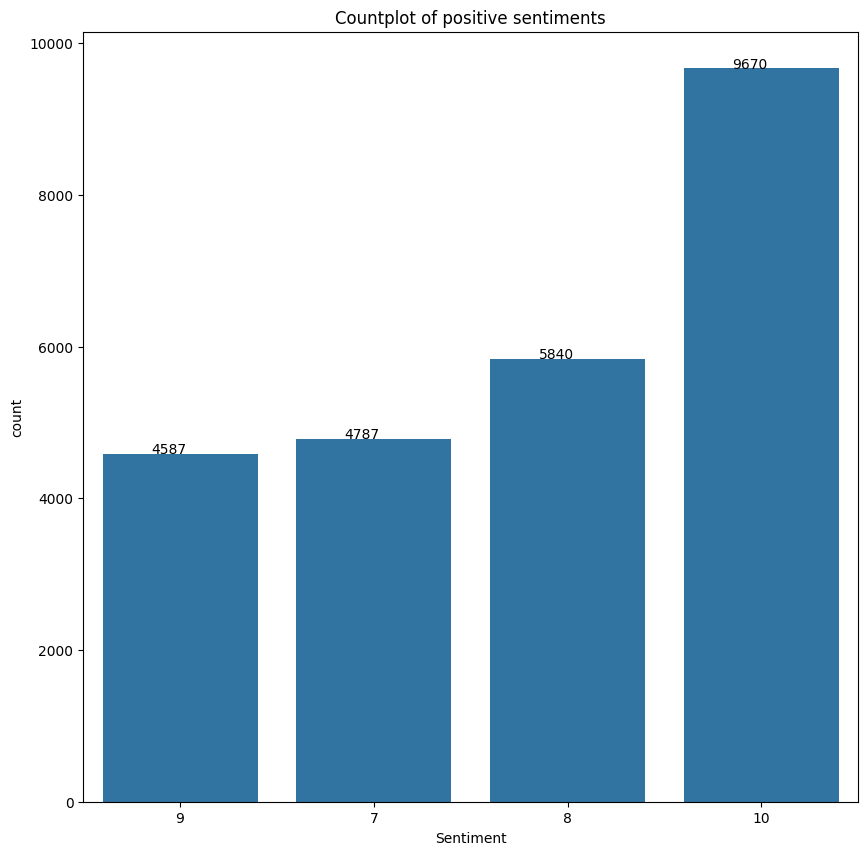

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.countplot(
    x="Sentiment",
    data=pos_df,
    order=pos_df['Sentiment'].value_counts(ascending=True).index
)

for p, label in zip(ax.patches, pos_df['Sentiment'].value_counts(ascending=True)):
    ax.annotate(label, (p.get_x() + 0.25, p.get_height() + 0.5))

plt.title("Countplot of positive sentiments")

Spread of negative sentiments

Text(0.5, 1.0, 'Countplot of negative sentiments')

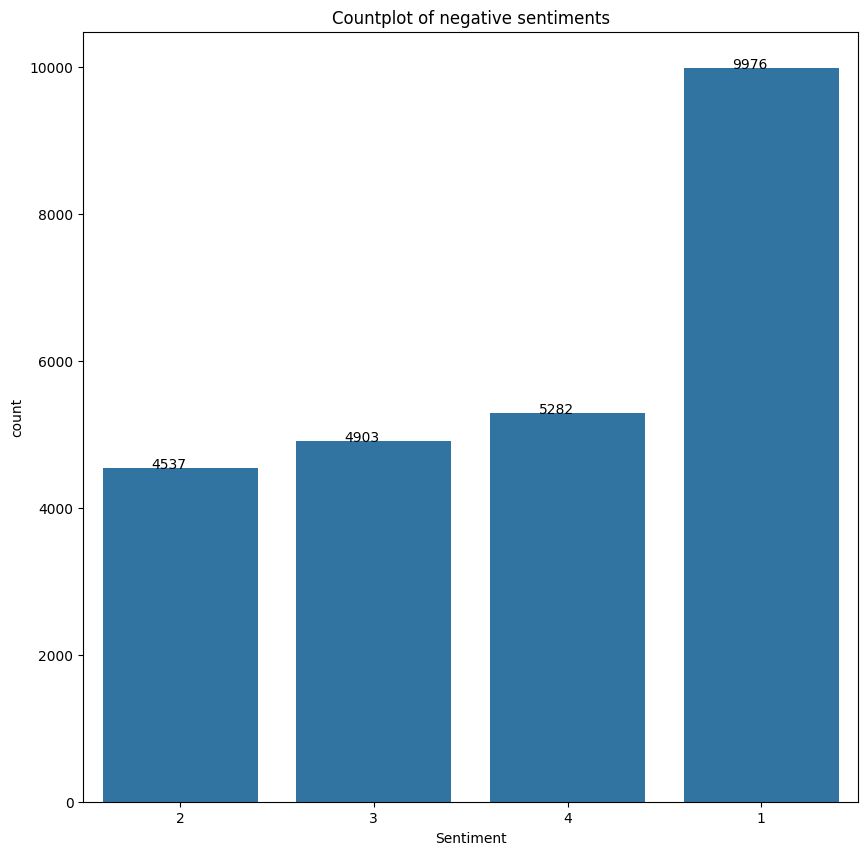

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.countplot(
    x="Sentiment",
    data=neg_df,
    order=neg_df['Sentiment'].value_counts(ascending=True).index
)

for p, label in zip(ax.patches, neg_df['Sentiment'].value_counts(ascending=True)):
    ax.annotate(label, (p.get_x() + 0.25, p.get_height() + 0.5))

plt.title("Countplot of negative sentiments")

In [ ]:
temp_pos_df['positive?'] = 'positive'
temp_neg_df['positive?'] = 'negative'

temp_combined_df = pd.concat([temp_pos_df, temp_neg_df], ignore_index=True)
temp_combined_df.head()

,Text,Sentiment,word_count,positive?
0,this documentary has been aired on both rte an...,7,144,positive
1,"this 8 minute gem is not only timeless, but it...",10,173,positive
2,i thought this movie was fun. i have never rea...,10,154,positive
3,this was the second of three films that irving...,8,349,positive
4,i found 'still crazy' to be marvelously entert...,9,256,positive


Text(0.5, 1.0, 'Histogram of length of reviews in positive sentiments')

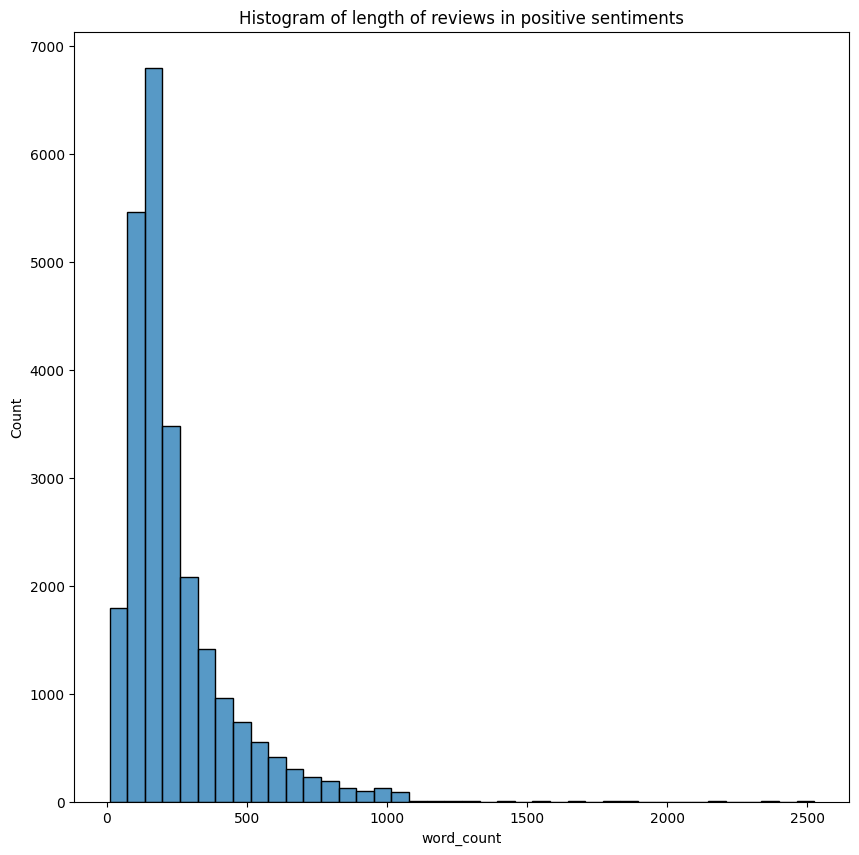

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.histplot(
    data=temp_pos_df,
    x='word_count',
    bins=40,
)

plt.title("Histogram of length of reviews in positive sentiments")

Text(0.5, 1.0, 'Histogram of length of reviews in negative sentiments')

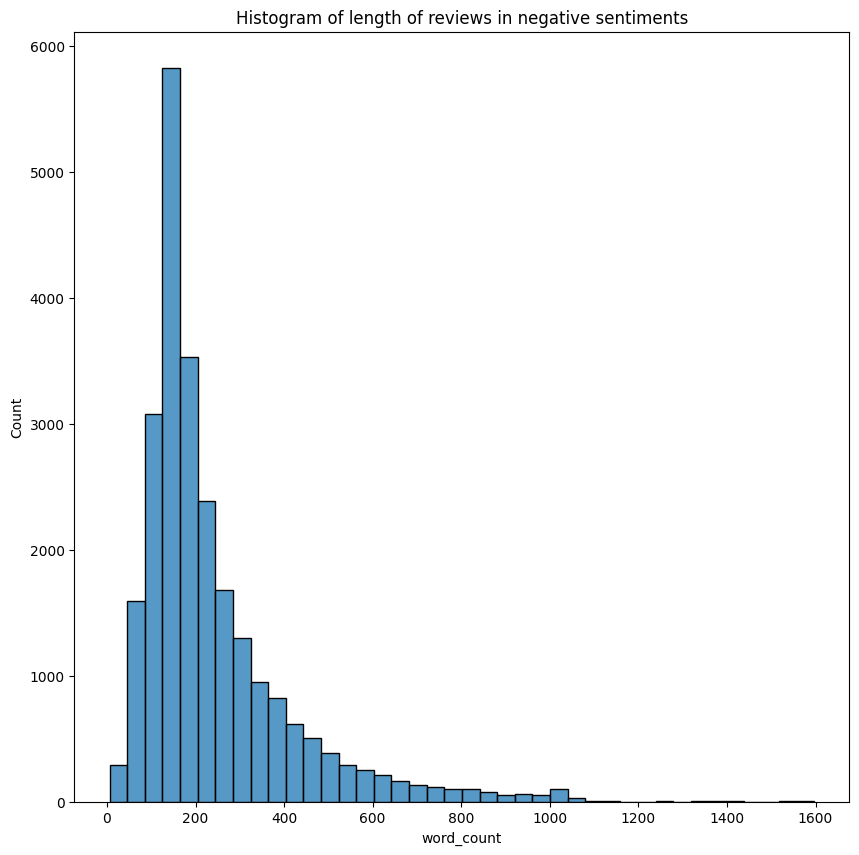

In [ ]:
plt.figure(figsize=(10,10))

ax = sns.histplot(
    data=temp_neg_df,
    x='word_count',
    bins=40,
)

plt.title("Histogram of length of reviews in negative sentiments")

Text(0.5, 1.0, 'Length of reviews in positive and negative sentiments')

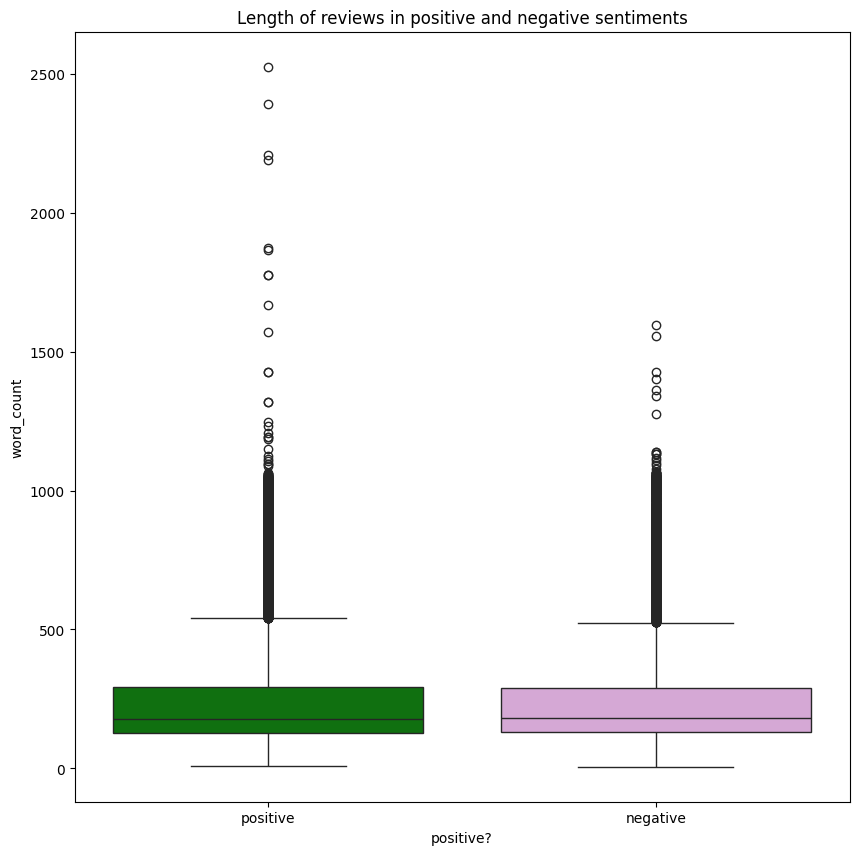

In [ ]:
plt.figure(figsize=(10,10))
palette = ['g', 'plum']

ax = sns.boxplot(
    data=temp_combined_df,
    y='word_count',
    x='positive?',
    palette=palette
)
plt.title("Length of reviews in positive and negative sentiments")

In [ ]:
pos_median = temp_pos_df['word_count'].median()
neg_median = temp_neg_df['word_count'].median()
print(f"Median word count of positive data: {int(pos_median)}")
print(f"Median word count of negative data: {int(neg_median)}")

Median word count of positive data: 178
Median word count of negative data: 181


In [ ]:
pos_max = temp_pos_df['word_count'].max()
neg_max = temp_neg_df['word_count'].max()
print(f"Max word count of positive data: {int(pos_max)}")
print(f"Max word count of negative data: {int(neg_max)}")

Max word count of positive data: 2525
Max word count of negative data: 1597


Outlier removal for positive dataset

In [ ]:
num_above_max = temp_pos_df[temp_pos_df['word_count'] >= neg_max]
num_above_max

,Text,Sentiment,word_count,positive?
583,match 1: tag team table match bubba ray and sp...,9,2525,positive
9305,"back in the mid/late 80s, an oav anime by titl...",10,2206,positive
12990,**attention spoilers**<br /><br />first of all...,9,1872,positive
13023,*!!- spoilers - !!*<br /><br />before i begin ...,10,1667,positive
14028,if anyone ever assembles a compendium on moder...,9,1776,positive
14961,"(some spoilers included:)<br /><br />although,...",7,2190,positive
15782,there is a sign on the lost highway that says:...,10,2390,positive
20418,by now you have probably heard a bit about the...,10,1776,positive
22993,titanic directed by james cameron presents a f...,9,1866,positive


In [ ]:
temp_pos_df = temp_pos_df[temp_pos_df['word_count'] < neg_max]
# re initialise
pos_df = temp_pos_df[['Text', 'Sentiment']]

## Splitting into train and test

In [ ]:
# Bring all positive rating values down to range of 5-8 (to ensure continuous range of ratings)
pos_df['Sentiment'] = pos_df['Sentiment'] - 2

# Merging data into one dataset
data = pd.concat([pos_df, neg_df], ignore_index=True)

In [ ]:
data.head()

,Text,Sentiment
0,this documentary has been aired on both rte an...,5
1,"this 8 minute gem is not only timeless, but it...",8
2,i thought this movie was fun. i have never rea...,8
3,this was the second of three films that irving...,6
4,i found 'still crazy' to be marvelously entert...,7


In [ ]:
data.shape

(49573, 2)

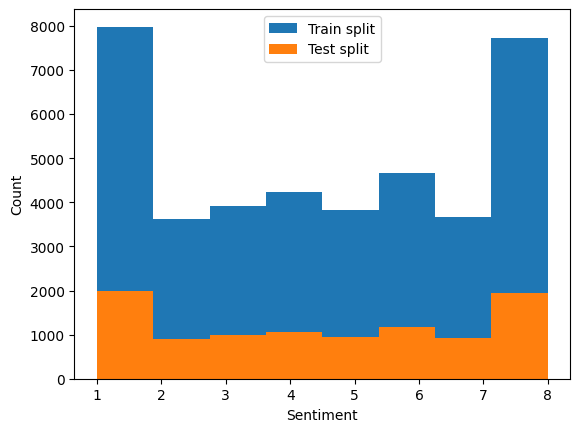

In [ ]:
from sklearn.model_selection import train_test_split

X = data['Text']
y = data['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200, stratify=y)
train_split = pd.concat([pd.DataFrame(X_train), pd.DataFrame(y_train)], ignore_index=True, axis=1)
train_split = train_split.rename(columns={0: 'Text', 1: 'Sentiment'})

test_split = pd.concat([pd.DataFrame(X_test), pd.DataFrame(y_test)], ignore_index=True, axis=1)
test_split = test_split.rename(columns={0: 'Text', 1: 'Sentiment'})

plt.hist(train_split['Sentiment'], bins=8)
plt.hist(test_split['Sentiment'], bins=8)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.legend(['Train split', 'Test split'])

In [ ]:
train_split['Sentiment'].value_counts()

Sentiment
1    7981
8    7733
6    4672
4    4225
3    3922
5    3829
7    3666
2    3630
Name: count, dtype: int64

In [ ]:
test_split['Sentiment'].value_counts()

Sentiment
1    1995
8    1933
6    1168
4    1057
3     981
5     957
7     917
2     907
Name: count, dtype: int64

In [ ]:
train_split.head()

,Text,Sentiment
3795,i saw this when it premiered and just re-watch...,8
1811,this movie is one of my all-time favorites. i ...,6
3700,describing stalingrad as a war film may be a b...,8
12392,"""tale of two sisters"" has to be one of the cre...",8
27963,"well, i notice imdb has not offered any plot i...",1


In [ ]:
test_split.head()

,Text,Sentiment
22247,frank horrigan (clint eastwood) is being haras...,6
9863,"carly jones (elisha curtberth), her bad boy br...",5
24238,dig! i would say to anyone even if you do not ...,5
46041,this is a great premise for a movie. the overa...,4
46926,"the underground comedy movie, is possibly the ...",1


## Convert Files to CSVs

In [ ]:
train_split.to_csv("train_data.csv", index = False)
test_split.to_csv("test_data.csv", index = False)